In [1]:
!pip install pandas




In [2]:
!pip install matplotlib
!pip install seaborn



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

In [4]:
# Using a raw string to avoid needing to escape backslashes
file_path = r"C:\Users\DELL\Desktop\Projetct_prediction_cars\car_price_prediction.csv"

try:
  # Attempt to read the CSV file
  data = pd.read_csv(file_path)
except FileNotFoundError:
  # Handle the case where the file is not found
  print("Error: File not found at", file_path)
except pd.errors.ParserError:
  # Handle potential parsing errors if the file format is unexpected
  print("Error: Could not parse the CSV file at", file_path)
else:
  # If reading is successful, you can proceed with using the DataFrame 'df'
  print("CSV file read successfully!")
  # Your data analysis or processing using 'df' would go here

CSV file read successfully!


# 1- Explore Data 

In [5]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
data.shape

(19237, 18)

In [7]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [9]:
data.duplicated().sum()


313

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [12]:
data.shape

(18924, 18)

# 2- Analysis


In [13]:
for col in data.columns:
  print(col,":",data[col].nunique())

ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


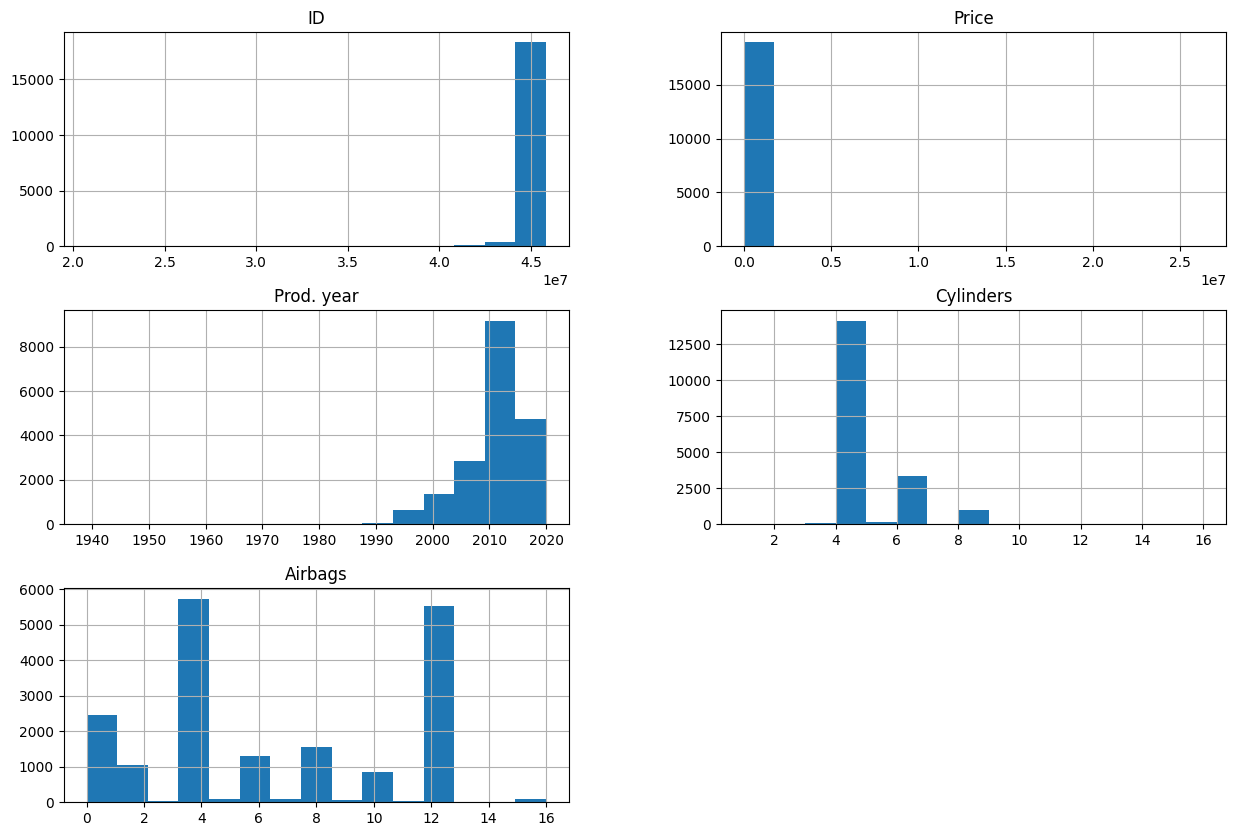

In [14]:
data.hist(bins=15, figsize=(15, 10))
plt.show()


In [15]:
top10Cars = data['Manufacturer'].value_counts().sort_values(ascending=False)[:10]
top10Cars

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

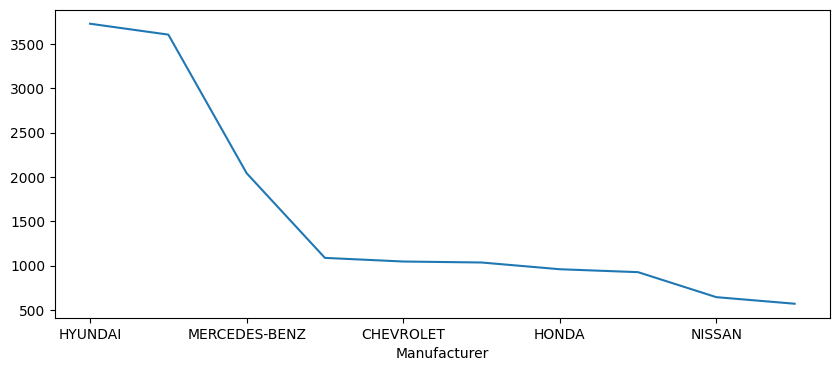

In [16]:
top10Cars.plot( figsize=(10,4))
plt.show()

In [17]:
data_objects = data.select_dtypes(include='object')

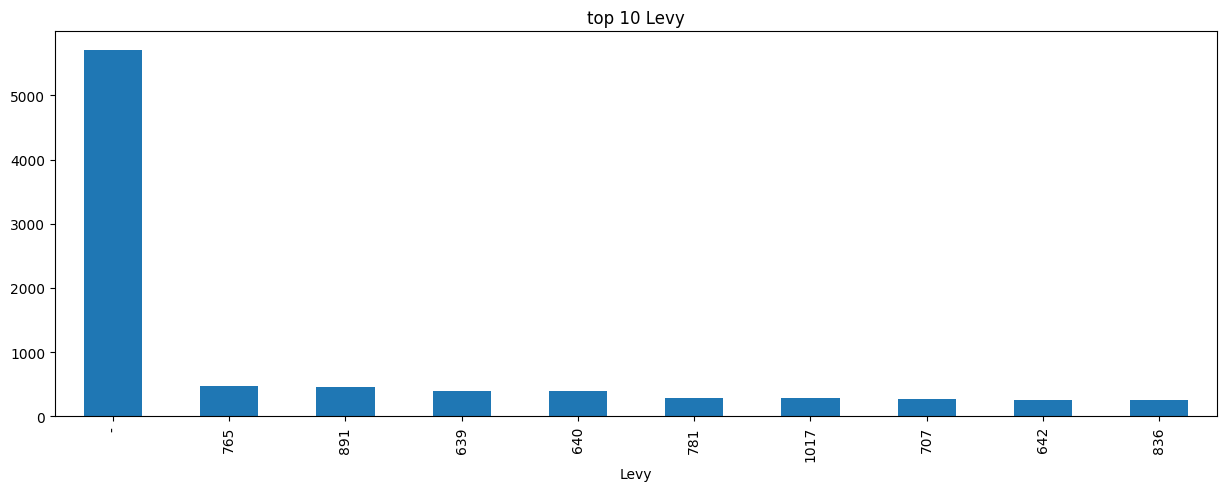

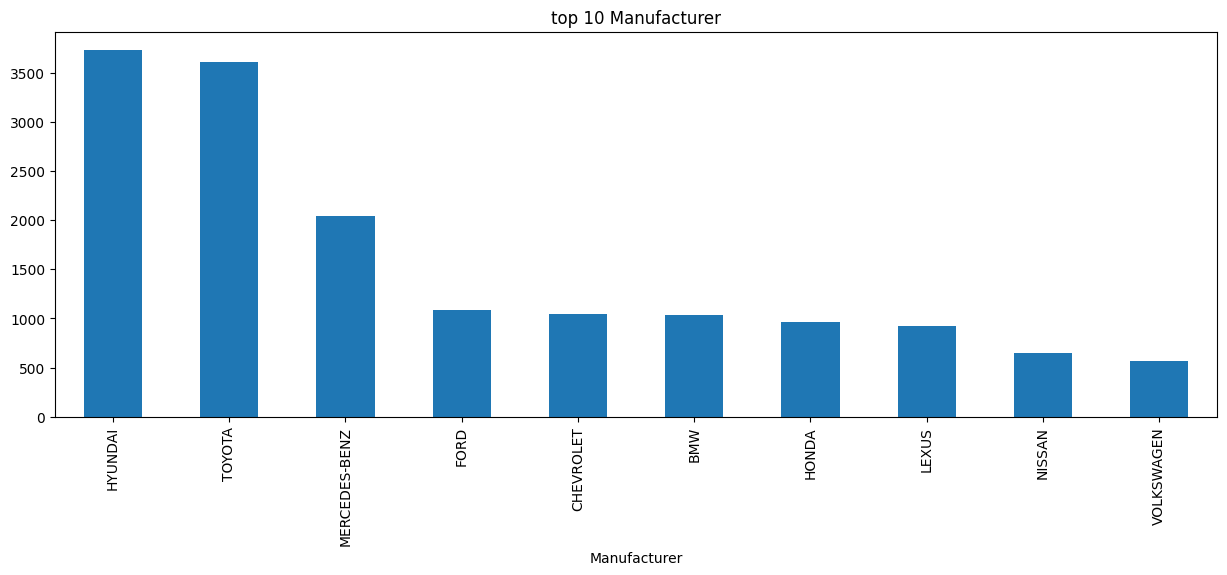

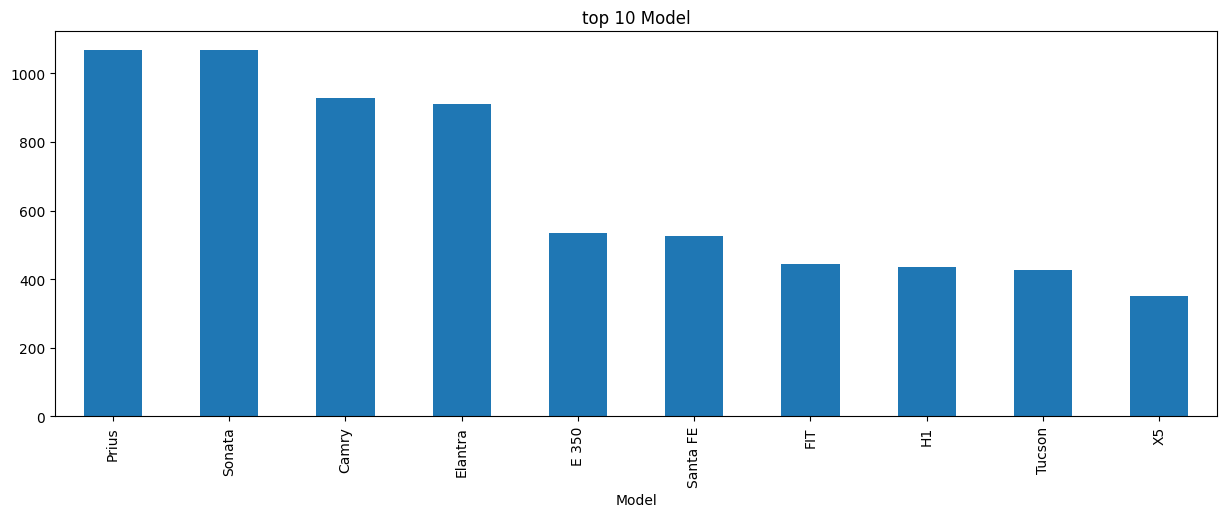

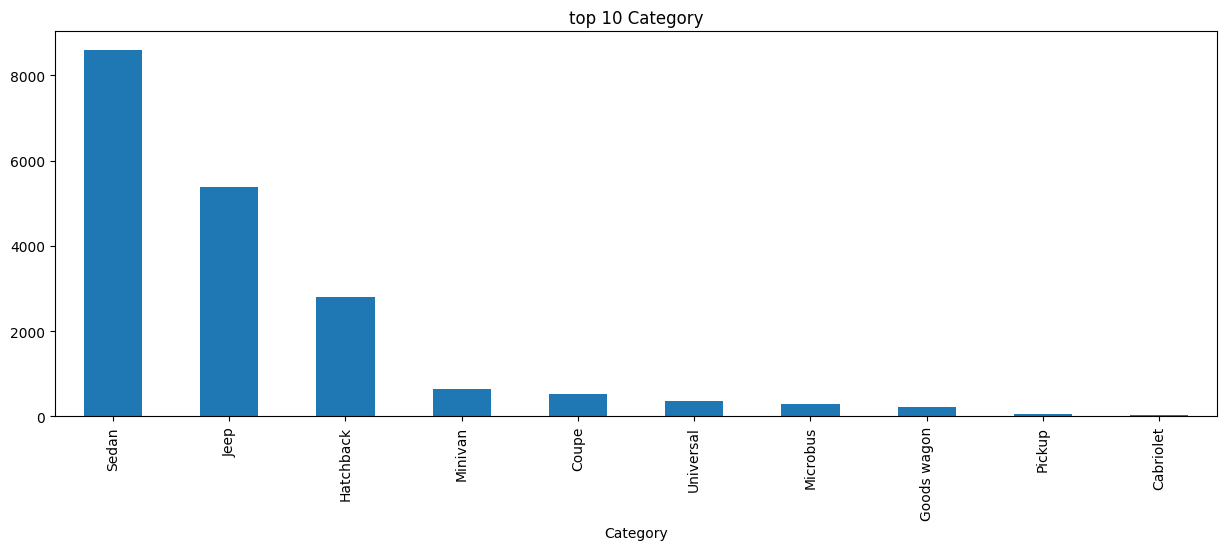

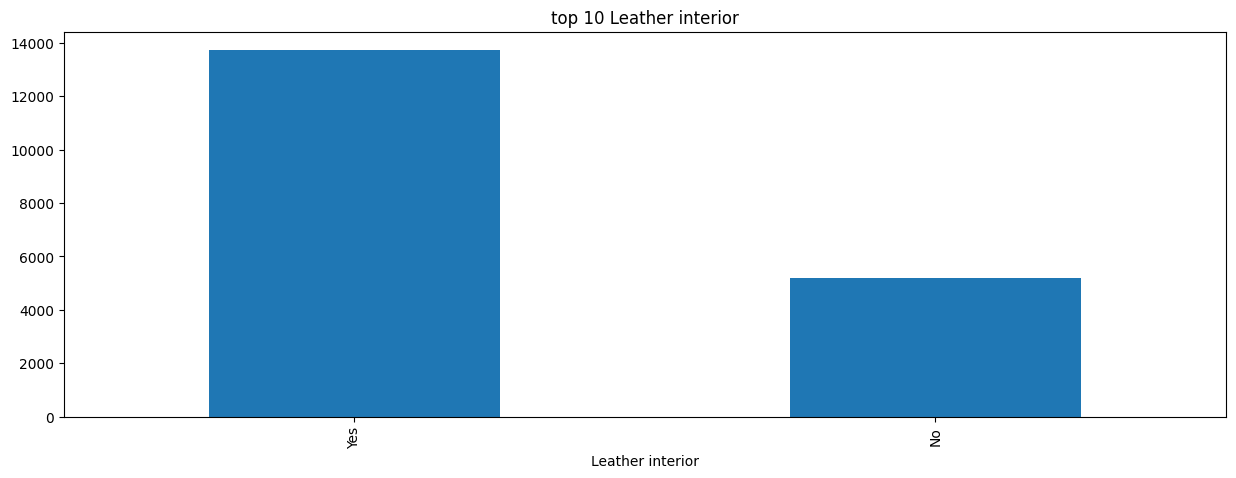

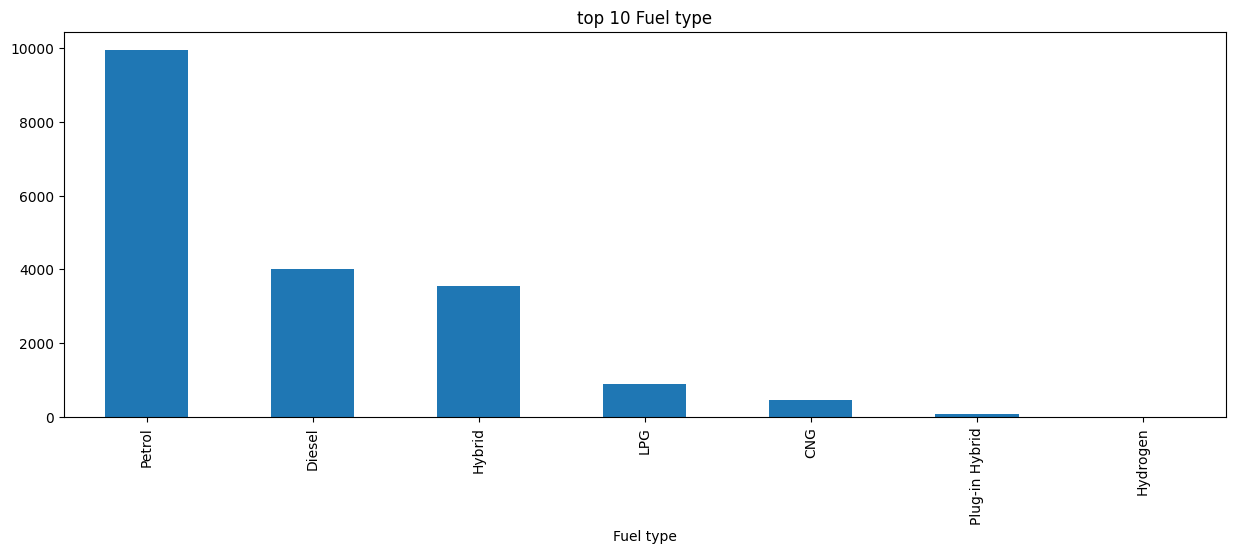

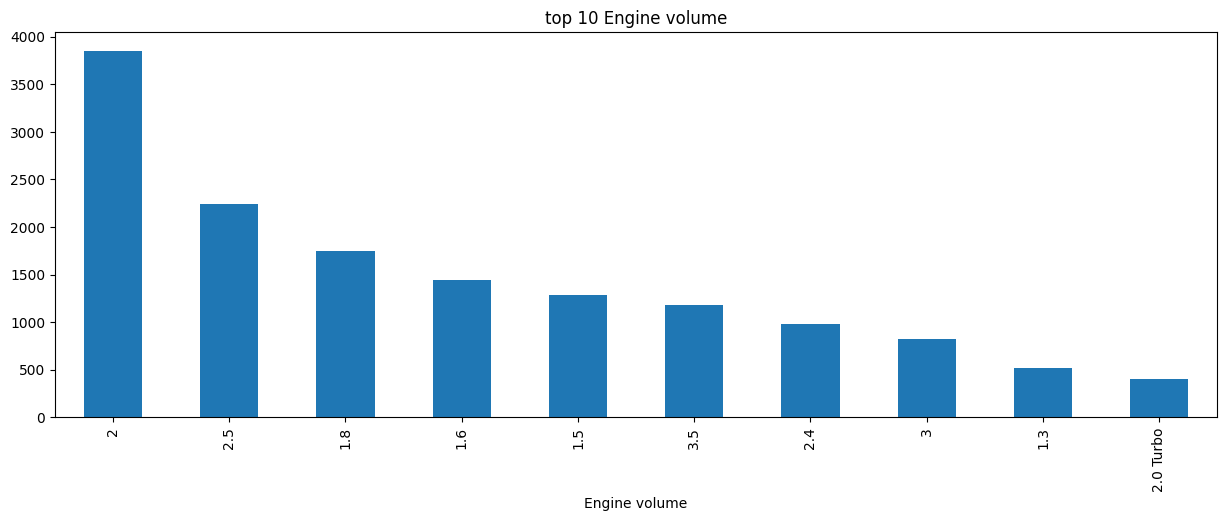

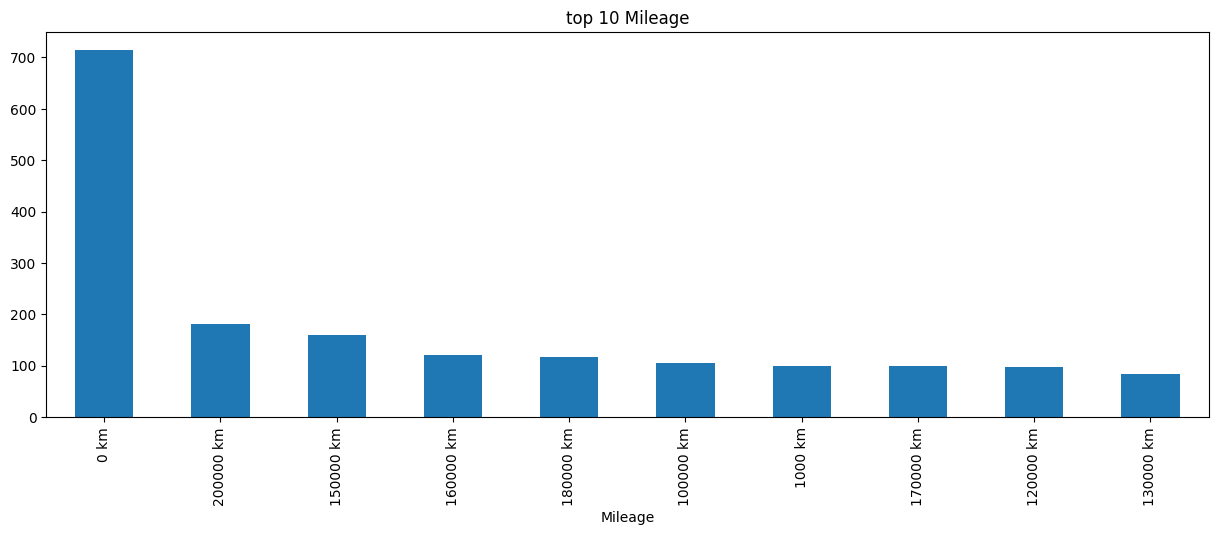

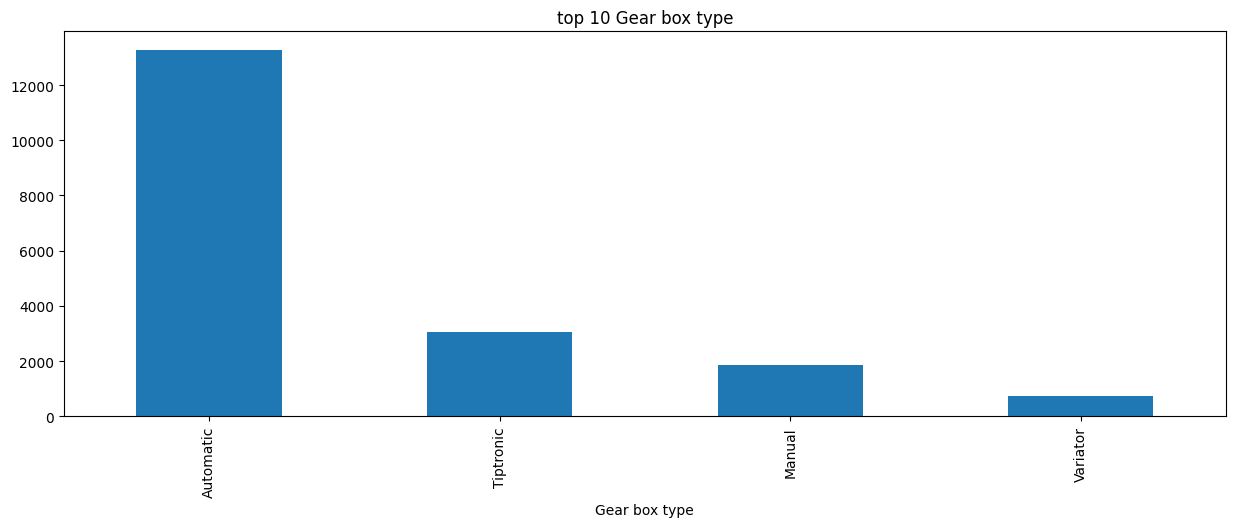

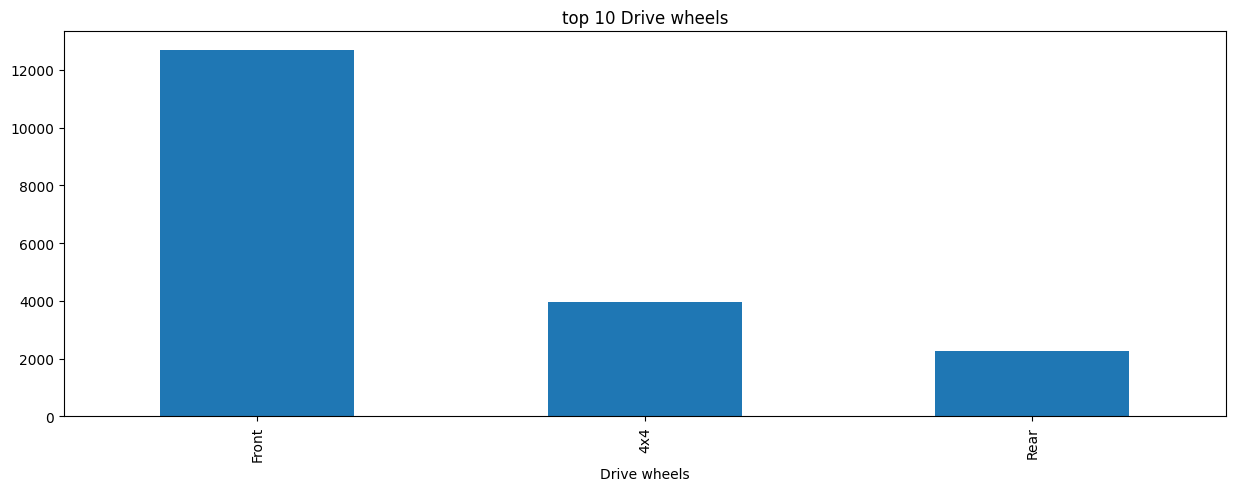

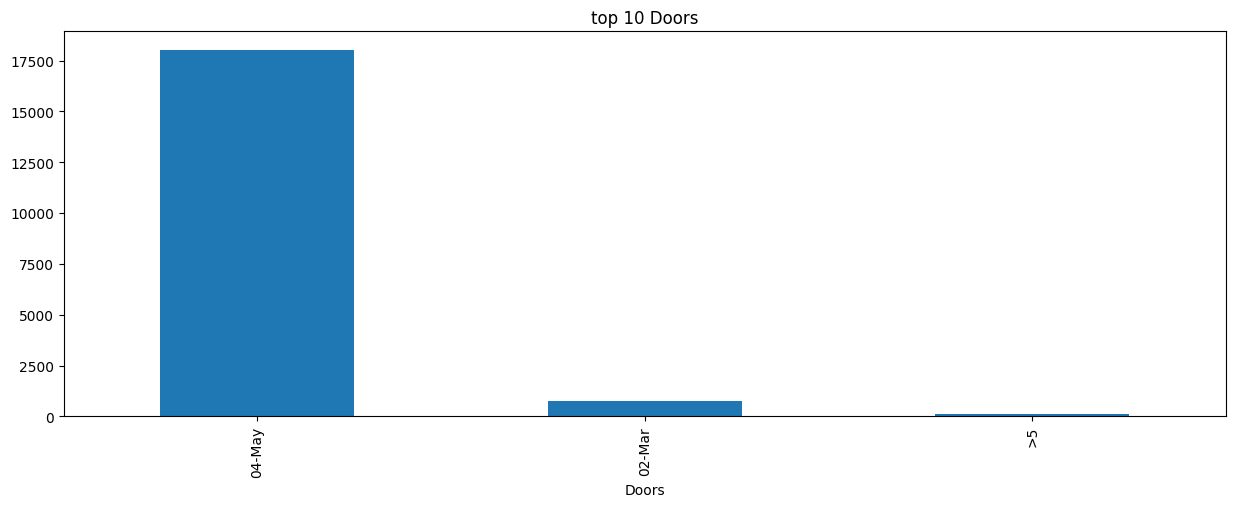

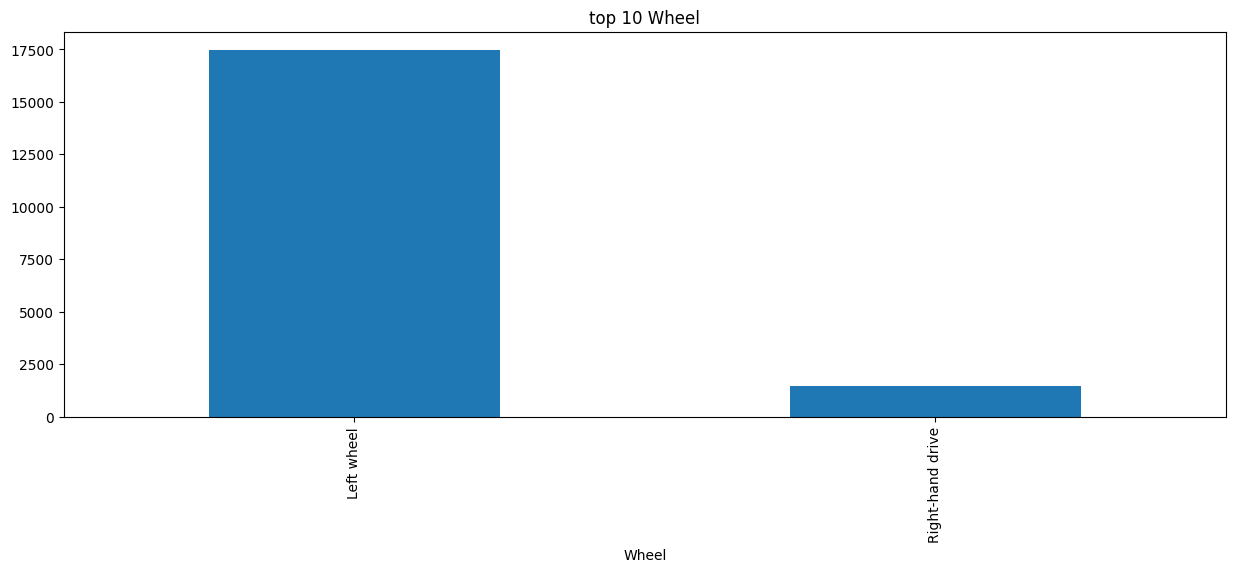

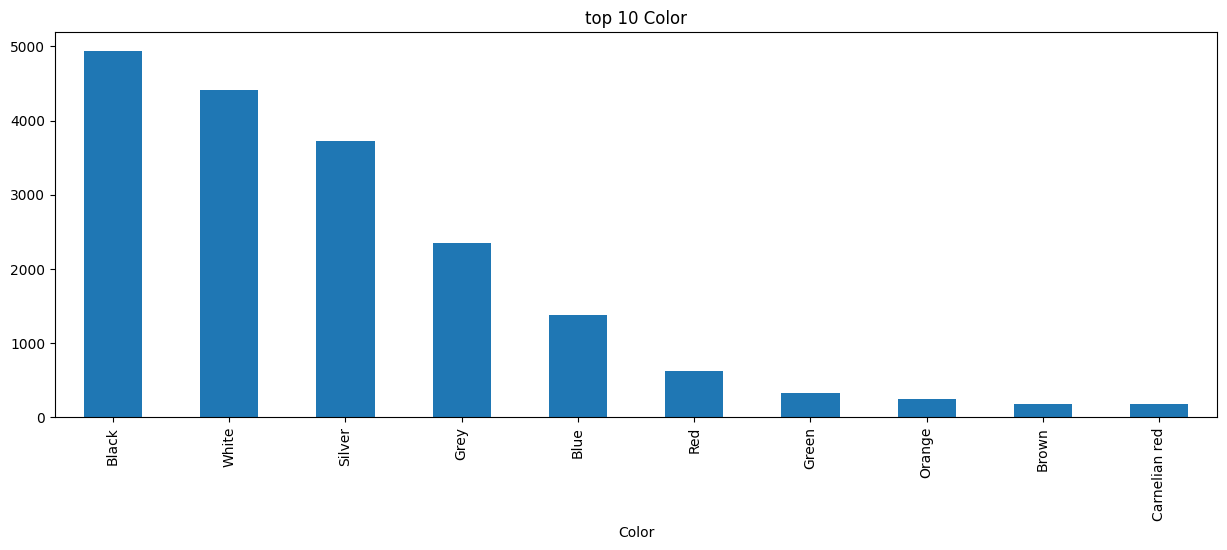

In [18]:
for object in data_objects:
   plt.figure(figsize=(15,5))
   top10=data[object].value_counts()[:10]
   top10.plot(kind='bar')
   plt.title("top 10"+" "+object)
   plt.show()


# 3- Data Processing

In [19]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [20]:
data=data.drop(['ID','Doors'],axis=1)

In [21]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


In [22]:
import datetime
datet=datetime.datetime.now()

In [23]:
data['Age']=datet.year-data['Prod. year']

In [24]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,10


In [25]:
data=data.drop(['Prod. year'],axis=1)

In [26]:
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,10


In [27]:
data.Levy.replace({'-':'0'},inplace=True)

In [28]:
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,10


In [29]:
data['Levy']=data['Levy'].astype(int)

In [30]:
data['Mileage']=data['Mileage'].str.replace('km','')

In [31]:
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,10


In [32]:
data['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [33]:
data['Engine volume']=data['Engine volume'].str.replace('Turbo','')

In [34]:
data['Engine volume']=data['Engine volume'].astype(float)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int32  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  object 
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: float64(2), int32(1), int64(3), object(10)

# 4- Detect Outliers 

In [36]:
data['Age'].describe() 

count    18924.000000
mean        13.085764
std          5.665749
min          4.000000
25%          9.000000
50%         12.000000
75%         15.000000
max         85.000000
Name: Age, dtype: float64

In [37]:
data['Price'].describe()

count    1.892400e+04
mean     1.858744e+04
std      1.921356e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.206300e+04
max      2.630750e+07
Name: Price, dtype: float64

In [38]:
data_numeric = data.select_dtypes(exclude='object')
for col in data_numeric:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr
    outliers=((data_numeric[col]>high)|(data_numeric[col]<low)).sum()
    if outliers> 0:
        data=data.loc[(data[col]>=low) & (data[col]<=high)]
        
    

In [39]:
data['Age'].describe() 

count    12240.000000
mean        11.551225
std          3.436964
min          4.000000
25%          9.000000
50%         11.000000
75%         13.000000
max         21.000000
Name: Age, dtype: float64

# 5- Trnsform Data 


In [40]:
data['Manufacturer'].unique()


array(['HONDA', 'FORD', 'HYUNDAI', 'TOYOTA', 'MERCEDES-BENZ',
       'VOLKSWAGEN', 'RENAULT', 'NISSAN', 'CHEVROLET', 'SUBARU', 'DAEWOO',
       'BMW', 'KIA', 'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT',
       'SUZUKI', 'LEXUS', 'OPEL', 'AUDI', 'CITROEN', 'MINI', 'DODGE',
       'LAND ROVER', 'JEEP', 'ACURA', 'VAZ', 'JAGUAR', 'SKODA',
       'CHRYSLER', 'LINCOLN', 'BUICK', 'PEUGEOT', 'სხვა', 'HAVAL',
       'CADILLAC', 'SCION', 'INFINITI', 'PORSCHE', 'LANCIA', 'MERCURY',
       'SAAB', 'VOLVO', 'ALFA ROMEO', 'SATURN', 'GAZ'], dtype=object)

In [41]:

data['Model'].unique()

array(['FIT', 'Escape', 'Santa FE', 'Prius', 'Sonata', 'Camry', 'CHR',
       'Elantra', 'E 220', 'H1', 'Jetta', 'Prius C', 'Aqua',
       'Escape Hybrid', 'Civic', 'Megane 1.5CDI', 'E 300', 'Juke',
       'Cruze LT', 'Fusion', 'VOXY', 'A 160', 'Tucson', 'Captiva',
       'Mustang', 'Yaris', 'Cruze', 'Orlando', 'Forester', 'Lacetti',
       '428 Sport Line', 'Genesis', 'Sprinter', 'Focus SE', 'Picanto',
       'Airtrek', 'Korando', '616', 'Serena', 'RAV 4', 'Volt', 'TERRAIN',
       'Hr-v EX', '500', 'Elantra sport limited', 'A 170', 'REXTON',
       'Carnival grand', '1000', 'C 250', 'Vitz funkargo', 'Transit',
       'Vaneo', 'Tacoma', 'Explorer', 'I30', 'Grand Vitara', 'CT 200h',
       'Veloster', 'RAV 4 XLE Sport', 'Sienta', 'Passat',
       'Avalon LIMITED', 'Cerato K3', 'CX-7', 'Astra G', 'Corolla',
       'Rogue', 'GLA 250', 'Sharan', 'Tiida', 'C 300', 'Actyon', 'S 350',
       'RAV 4 Le', 'E 350 ამგ', 'Cr-v', 'Avalon', 'ML 250', 'Colt Lancer',
       'Outlander', 'Camry SE', '

In [42]:
data.Levy.unique()

array([   0,  862,  446,  891,  761,  751,  394, 1079,  810,  531,  586,
       1249,  583,  707, 1486, 1091,  650,  382,  503, 1017,  629,  781,
        530,  640,  765,  777,  779,  934,  769,  645, 1185,  830,  639,
       1111,  760,  642, 1095,  966,  473,  988,  687,  836, 1347,  259,
        609,  697,  585,  475,  690,  308, 1361, 1077,  584,  831, 1172,
        893, 1266,  447,  730,  502,  333, 1325,  247,  738,  481, 1282,
       1055,  456,  880,  900,  798, 1277,  442, 1051,  790, 1047,  528,
        574,  271, 1481, 1661, 1408, 1090,  595, 1267,  878,  641,  749,
        353,  877, 1236, 1141,  397,  784, 1024, 1357,  922, 1438,  753,
        638,  490,  431,  565,  833,  489,  986, 1620,  474, 1099,  978,
        915, 1268,  924,  770,  649,  551,  607,  993,  800,  971, 1273,
       1323, 1845,  694,  463,  419,  345, 1505, 2056,  729,  460,  876,
        911,  780,  448, 1148,  834, 1275, 1327,  724,  890,  696, 1705,
        505,  789,  518, 1288, 1103,  557,  843,  7

In [43]:
data.Category.unique()

array(['Hatchback', 'Jeep', 'Sedan', 'Universal', 'Minivan', 'Cabriolet',
       'Coupe', 'Microbus', 'Goods wagon', 'Pickup'], dtype=object)

In [44]:
data['Leather interior'].unique()


array(['No', 'Yes'], dtype=object)

In [45]:
data['Fuel type'].unique()


array(['Petrol', 'Hybrid', 'Diesel', 'Plug-in Hybrid', 'LPG', 'CNG'],
      dtype=object)

In [46]:
data.Mileage.unique()


array(['200000 ', '168966 ', '91901 ', ..., '140607 ', '307325 ',
       '186923 '], dtype=object)

In [47]:
data['Gear box type'].unique()


array(['Variator', 'Automatic', 'Tiptronic', 'Manual'], dtype=object)

In [48]:
data['Drive wheels'].unique()


array(['Front', '4x4', 'Rear'], dtype=object)

In [49]:
data.Wheel.unique()


array(['Right-hand drive', 'Left wheel'], dtype=object)

In [50]:
data.Mileage.unique()


array(['200000 ', '168966 ', '91901 ', ..., '140607 ', '307325 ',
       '186923 '], dtype=object)

In [51]:
data.Color.unique()


array(['Black', 'White', 'Silver', 'Grey', 'Blue', 'Sky blue', 'Red',
       'Orange', 'Green', 'Yellow', 'Brown', 'Golden', 'Beige',
       'Carnelian red', 'Purple', 'Pink'], dtype=object)

In [52]:
data.Levy.unique()


array([   0,  862,  446,  891,  761,  751,  394, 1079,  810,  531,  586,
       1249,  583,  707, 1486, 1091,  650,  382,  503, 1017,  629,  781,
        530,  640,  765,  777,  779,  934,  769,  645, 1185,  830,  639,
       1111,  760,  642, 1095,  966,  473,  988,  687,  836, 1347,  259,
        609,  697,  585,  475,  690,  308, 1361, 1077,  584,  831, 1172,
        893, 1266,  447,  730,  502,  333, 1325,  247,  738,  481, 1282,
       1055,  456,  880,  900,  798, 1277,  442, 1051,  790, 1047,  528,
        574,  271, 1481, 1661, 1408, 1090,  595, 1267,  878,  641,  749,
        353,  877, 1236, 1141,  397,  784, 1024, 1357,  922, 1438,  753,
        638,  490,  431,  565,  833,  489,  986, 1620,  474, 1099,  978,
        915, 1268,  924,  770,  649,  551,  607,  993,  800,  971, 1273,
       1323, 1845,  694,  463,  419,  345, 1505, 2056,  729,  460,  876,
        911,  780,  448, 1148,  834, 1275, 1327,  724,  890,  696, 1705,
        505,  789,  518, 1288, 1103,  557,  843,  7

In [53]:
data['Engine volume'].unique()


array([1.3, 2.5, 2. , 1.8, 2.4, 1.6, 2.2, 1.5, 1.4, 2.3, 1.2, 1.7, 2.9,
       1.9, 2.7, 3.5, 2.1, 1. , 0.8, 3. , 3.3, 2.8, 3.2, 1.1])

In [54]:
data.Cylinders.unique()


array([4.])

In [55]:
data.Airbags.unique()


array([ 2,  0,  4, 12,  8, 10,  6,  1, 16,  7,  9,  5, 11,  3, 14, 15, 13],
      dtype=int64)

In [56]:
data.Age.unique()

array([18, 13, 10,  8, 14, 11,  6, 12,  7, 16,  9, 17, 20, 15,  5, 19, 21,
        4], dtype=int64)

In [57]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
la = LabelEncoder()

# Select object and numeric columns separately
data_object = data.select_dtypes(include='object')
data_numeric = data.select_dtypes(exclude='object')

# Encode categorical columns
data_object_encoded = data_object.apply(lambda x: la.fit_transform(x))

# Concatenate encoded categorical columns and numeric columns
data_encoded = pd.concat([data_object_encoded, data_numeric], axis=1)

# Check the information of the transformed DataFrame
data_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12240 entries, 2 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      12240 non-null  int32  
 1   Model             12240 non-null  int32  
 2   Category          12240 non-null  int32  
 3   Leather interior  12240 non-null  int32  
 4   Fuel type         12240 non-null  int32  
 5   Mileage           12240 non-null  int32  
 6   Gear box type     12240 non-null  int32  
 7   Drive wheels      12240 non-null  int32  
 8   Wheel             12240 non-null  int32  
 9   Color             12240 non-null  int32  
 10  Price             12240 non-null  int64  
 11  Levy              12240 non-null  int32  
 12  Engine volume     12240 non-null  float64
 13  Cylinders         12240 non-null  float64
 14  Airbags           12240 non-null  int64  
 15  Age               12240 non-null  int64  
dtypes: float64(2), int32(11), int64(3)
memory usa

In [58]:
data=data_encoded

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12240 entries, 2 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      12240 non-null  int32  
 1   Model             12240 non-null  int32  
 2   Category          12240 non-null  int32  
 3   Leather interior  12240 non-null  int32  
 4   Fuel type         12240 non-null  int32  
 5   Mileage           12240 non-null  int32  
 6   Gear box type     12240 non-null  int32  
 7   Drive wheels      12240 non-null  int32  
 8   Wheel             12240 non-null  int32  
 9   Color             12240 non-null  int32  
 10  Price             12240 non-null  int64  
 11  Levy              12240 non-null  int32  
 12  Engine volume     12240 non-null  float64
 13  Cylinders         12240 non-null  float64
 14  Airbags           12240 non-null  int64  
 15  Age               12240 non-null  int64  
dtypes: float64(2), int32(11), int64(3)
memory usa

# 4-Model 


In [3]:
from sklearn.model_selection import train_test_split


In [4]:
x=data.drop('Price',axis=1)
y=data['Price']

NameError: name 'data' is not defined

In [2]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


NameError: name 'train_test_split' is not defined

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  # For regression tasks
from sklearn.ensemble import RandomForestRegressor  # For regression tasks
from sklearn.ensemble import GradientBoostingRegressor  # For regression tasks
import xgboost as xgb  # For classification and regression tasks (install with `pip install xgboost`)
from sklearn.svm import SVR  # For regression tasks


In [64]:
from sklearn.metrics import r2_score, mean_squared_error


In [65]:
Algorithm=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','SVR']
R2=[]
RMSE=[]
def Models(Model, x_train, y_train, x_test, y_test):
  """Evaluates a machine learning model using R-squared and RMSE."""

  # Train the model
  Model.fit(x_train, y_train)

  # Make predictions on the test set
  pre = Model.predict(x_test)

  # Calculate evaluation metrics
  re = r2_score(y_test, pre)
  R2.append(re)
  rmse = np.sqrt(mean_squared_error(y_test, pre))
  RMSE.append(rmse)
  # Optionally, use model-specific score (if applicable)
  score = Model.score(x_test, y_test)  # Might be model-specific

  # Print the results
  print(f"R-squared: {re:.4f}")
  print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
  if score is not None:
      print(f"Model-specific score: {score:.4f}")



In [66]:
# Create a LinearRegression model
Model1 = LinearRegression()
Model2 = DecisionTreeRegressor()
Model3 = RandomForestRegressor()
Model4 = GradientBoostingRegressor()
Model5 = SVR()

# Evaluate the model using the Models function
Models(Model1, x_train, y_train, x_test, y_test)
# Evaluate the model using the Models function
Models(Model2, x_train, y_train, x_test, y_test)
# Evaluate the model using the Models function
Models(Model3, x_train, y_train, x_test, y_test)
# Evaluate the model using the Models function
Models(Model4, x_train, y_train, x_test, y_test)
# Evaluate the model using the Models function
Models(Model5, x_train, y_train, x_test, y_test)


R-squared: 0.2093
Root Mean Squared Error (RMSE): 9896.4780
Model-specific score: 0.2093
R-squared: 0.6427
Root Mean Squared Error (RMSE): 6652.4851
Model-specific score: 0.6427
R-squared: 0.7701
Root Mean Squared Error (RMSE): 5335.8499
Model-specific score: 0.7701
R-squared: 0.6635
Root Mean Squared Error (RMSE): 6456.1940
Model-specific score: 0.6635
R-squared: -0.0036
Root Mean Squared Error (RMSE): 11149.3814
Model-specific score: -0.0036


In [67]:
df=pd.DataFrame({'Algorithm':Algorithm,'R2_Score':R2,'RMSE':RMSE})
df

,Algorithm,R2_Score,RMSE
0,LinearRegression,0.209298,9896.477993
1,DecisionTreeRegressor,0.642711,6652.485146
2,RandomForestRegressor,0.770142,5335.849886
3,GradientBoostingRegressor,0.663485,6456.193966
4,SVR,-0.003583,11149.381387


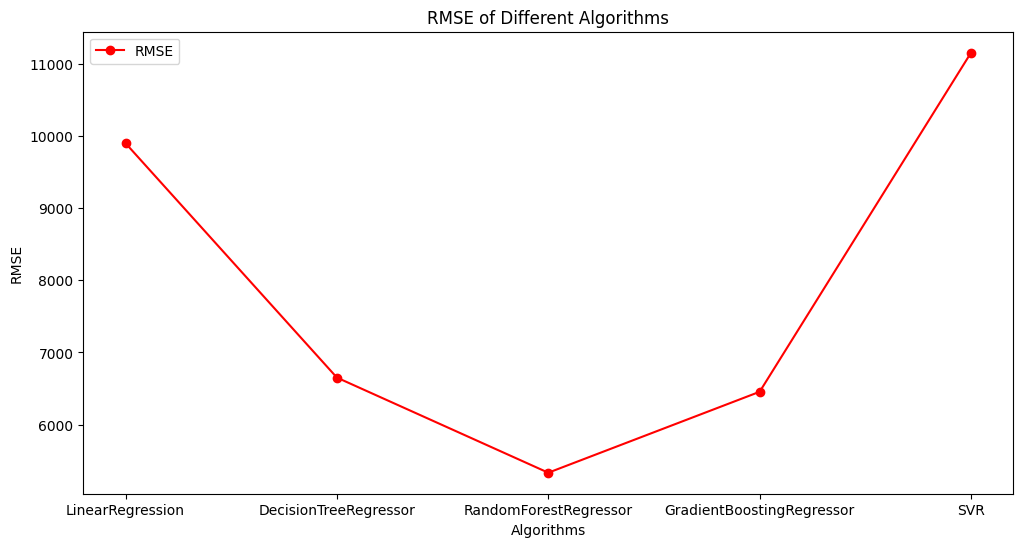

In [68]:

algorithms = df['Algorithm']
rmse_values = df['RMSE']
fig, ax = plt.subplots(figsize=(12, 6))  
ax.plot(algorithms, rmse_values, label='RMSE', color='red', marker='o') 
ax.set_title('RMSE of Different Algorithms')
ax.set_xlabel('Algorithms')
ax.set_ylabel('RMSE')

# Add a legend
ax.legend()

# Display the plot
plt.show()

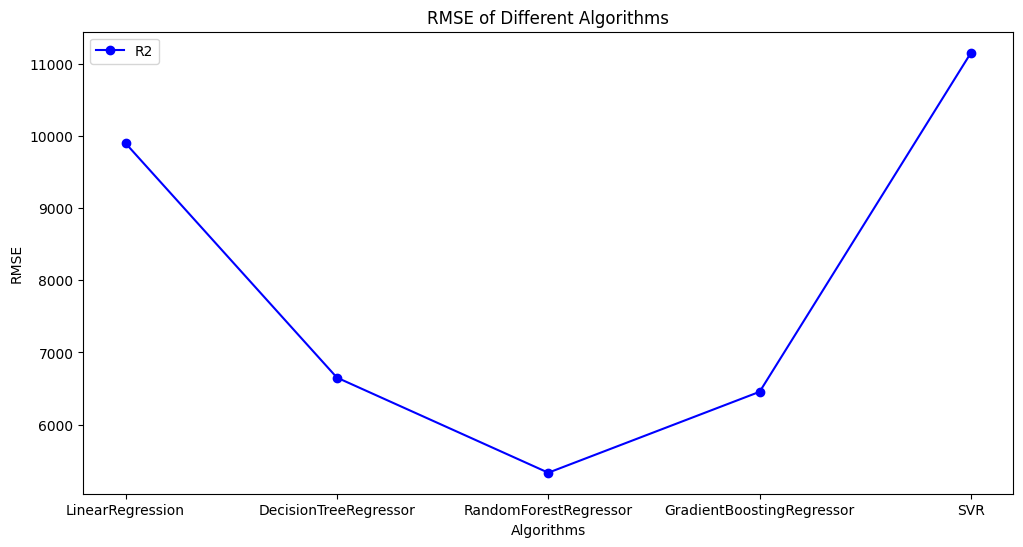

In [69]:
algorithms = df['Algorithm']
rmse_values = df['RMSE']
fig, ax = plt.subplots(figsize=(12, 6))  
ax.plot(algorithms, rmse_values, label='R2', color='blue', marker='o') 
ax.set_title('RMSE of Different Algorithms')
ax.set_xlabel('Algorithms')
ax.set_ylabel('RMSE')

# Add a legend
ax.legend()

# Display the plot
plt.show()

# 5-Using My Model to Predict New Data 

In [70]:
import pickle
file_name='prediction_price_cars.sav'

In [71]:
pickle.dump(Model2,open(file_name,'wb'))

In [72]:
data.Manufacturer.unique()

array([16, 12, 17, 43, 27, 45, 35, 31,  6, 41,  9,  3, 21, 30, 40, 26, 14,
       11, 42, 24, 32,  2,  8, 29, 10, 23, 20,  0, 44, 19, 39,  7, 25,  4,
       33, 47, 15,  5, 38, 18, 34, 22, 28, 36, 46,  1, 37, 13])

In [73]:
data.Model.unique()

array([347, 334, 683, 616, 697, 194, 167, 313, 294, 430, 469, 623,  99,
       336, 226, 545, 300, 484, 273, 397, 776,  66, 770, 213, 556, 836,
       269, 577, 383, 504,  37, 416, 725, 377, 611,  94, 499,  63, 689,
       652, 812, 743, 445,  40, 328,  67, 660, 217,   2, 145, 810, 758,
       778, 746, 344, 447, 427, 175, 784, 657, 694, 595, 119, 223, 184,
       112, 245, 672, 411, 691, 751, 152,  91, 676, 654, 304, 263, 118,
       523, 232, 581, 199, 525, 461,  98, 798, 414, 231, 153, 658, 407,
       124, 104, 571, 692, 509, 332, 808,  80, 497,  30, 329, 158, 821,
       661, 109, 249, 171, 371, 239, 235,  74, 254, 649, 570, 501, 462,
       374, 534, 537, 686,  25, 559, 720, 529, 437, 709, 323, 117, 308,
       680,  51, 279, 258, 246, 673,  83, 648,  86, 428, 444, 285, 185,
        89, 406, 393, 468, 238, 761, 833, 105, 549, 636, 717,   3, 306,
       721, 792, 366, 216, 737, 284, 739, 744,  73, 846, 450, 275, 452,
         8, 760, 582, 612, 224, 841,  16, 832, 207, 500, 567, 53

In [74]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12240 entries, 2 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      12240 non-null  int32  
 1   Model             12240 non-null  int32  
 2   Category          12240 non-null  int32  
 3   Leather interior  12240 non-null  int32  
 4   Fuel type         12240 non-null  int32  
 5   Mileage           12240 non-null  int32  
 6   Gear box type     12240 non-null  int32  
 7   Drive wheels      12240 non-null  int32  
 8   Wheel             12240 non-null  int32  
 9   Color             12240 non-null  int32  
 10  Price             12240 non-null  int64  
 11  Levy              12240 non-null  int32  
 12  Engine volume     12240 non-null  float64
 13  Cylinders         12240 non-null  float64
 14  Airbags           12240 non-null  int64  
 15  Age               12240 non-null  int64  
dtypes: float64(2), int32(11), int64(3)
memory usa

In [75]:
data.Category.unique()



array([3, 4, 8, 9, 6, 0, 1, 5, 2, 7])

In [76]:
data['Leather interior'].unique()


array([0, 1])

In [77]:
data['Fuel type'].unique()


array([4, 2, 1, 5, 3, 0])

In [78]:
data.Mileage.unique()


array([2493, 1954, 5679, ..., 1260, 3364, 2291])

In [79]:
data['Gear box type'].unique()


array([3, 0, 2, 1])

In [80]:
data['Drive wheels'].unique()


array([1, 0, 2])

In [81]:
data.Wheel.unique()


array([1, 0])

In [82]:
data.Mileage.unique()


array([2493, 1954, 5679, ..., 1260, 3364, 2291])

In [83]:
data.Color.unique()


array([ 1, 14, 12,  7,  2, 13, 11,  8,  6, 15,  3,  5,  0,  4, 10,  9])

In [84]:
data.Levy.unique()


array([   0,  862,  446,  891,  761,  751,  394, 1079,  810,  531,  586,
       1249,  583,  707, 1486, 1091,  650,  382,  503, 1017,  629,  781,
        530,  640,  765,  777,  779,  934,  769,  645, 1185,  830,  639,
       1111,  760,  642, 1095,  966,  473,  988,  687,  836, 1347,  259,
        609,  697,  585,  475,  690,  308, 1361, 1077,  584,  831, 1172,
        893, 1266,  447,  730,  502,  333, 1325,  247,  738,  481, 1282,
       1055,  456,  880,  900,  798, 1277,  442, 1051,  790, 1047,  528,
        574,  271, 1481, 1661, 1408, 1090,  595, 1267,  878,  641,  749,
        353,  877, 1236, 1141,  397,  784, 1024, 1357,  922, 1438,  753,
        638,  490,  431,  565,  833,  489,  986, 1620,  474, 1099,  978,
        915, 1268,  924,  770,  649,  551,  607,  993,  800,  971, 1273,
       1323, 1845,  694,  463,  419,  345, 1505, 2056,  729,  460,  876,
        911,  780,  448, 1148,  834, 1275, 1327,  724,  890,  696, 1705,
        505,  789,  518, 1288, 1103,  557,  843,  7

In [85]:
data['Engine volume'].unique()


array([1.3, 2.5, 2. , 1.8, 2.4, 1.6, 2.2, 1.5, 1.4, 2.3, 1.2, 1.7, 2.9,
       1.9, 2.7, 3.5, 2.1, 1. , 0.8, 3. , 3.3, 2.8, 3.2, 1.1])

In [86]:
data.Cylinders.unique()


array([4.])

In [87]:
data.Airbags.unique()


array([ 2,  0,  4, 12,  8, 10,  6,  1, 16,  7,  9,  5, 11,  3, 14, 15, 13],
      dtype=int64)

In [88]:
data.Age.unique()

array([18, 13, 10,  8, 14, 11,  6, 12,  7, 16,  9, 17, 20, 15,  5, 19, 21,
        4], dtype=int64)